In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('Gorakhpur.csv')

In [7]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Chowdhry Sweet House,500,"Mithai,North Indian,Chinese,Beverages",Gorakhpur,Golghar,Casual Dining,8am to 11pm(Mon-Sun),Good,3.6,71
1,Singh Burger,200,"Burger,Fast Food",Gorakhpur,Golghar,Quick Bites,11am to 11pm(Mon-Sun),Good,3.7,82
2,Rangrezza Restaurant,1000,"Mexican,Italian,Continental,Chinese,Mughlai,No...",Gorakhpur,Phase 3rd,Casual Dining,11am to 11pm(Mon-Sun),Good,3.6,130
3,Sher-E-Punjab Since 1965,500,"Mughlai,North Indian",Gorakhpur,Miyan Baza,Quick Bites,11am to 11pm(Mon-Sun),Good,3.8,240
4,Domino's Pizza,500,Pizza,Gorakhpur,Golghar,Quick Bites,11am to 12midnight(Mon-Sun),Average,3.4,192


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
Name                158 non-null object
Price               158 non-null int64
Cuisine_Category    158 non-null object
City                158 non-null object
Region              158 non-null object
Cuisine_Type        158 non-null object
Timing              158 non-null object
Rating_Types        158 non-null object
Rating              158 non-null float64
Votes               158 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 12.4+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [9]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [10]:
data.describe()

,Price,Rating,Votes
count,158.000000,158.000000,158.000000
mean,333.670886,3.327848,36.702532
std,253.902921,0.139550,41.647980
min,0.000000,3.200000,4.000000
25%,150.000000,3.200000,9.000000
50%,250.000000,3.300000,19.500000
75%,400.000000,3.400000,49.750000
max,1000.000000,3.800000,240.000000


In [11]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              0
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [12]:
data.Name.value_counts().head()

Cake O Holics       3
Pizza Cafe Day      2
Bite Club           2
Annapurna Sweets    2
Dinner Point        2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [13]:
data['Region'].value_counts()[:10]

Golghar                51
Azad Nagar             21
Shahpur                14
Betiahata              14
Rapti Nagar Phase 4     7
Shakti Nagar Colony     7
Hussain Nagar           6
Mughala                 4
Miyan Baza              4
Kunraghat               3
Name: Region, dtype: int64

Text(0.5,1,'Region')

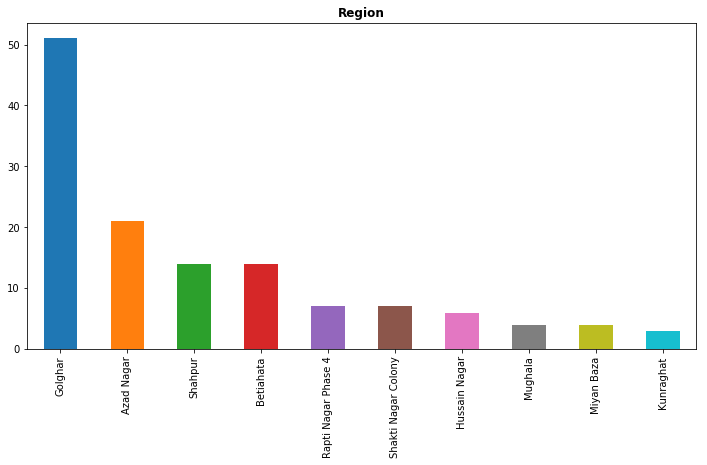

In [14]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

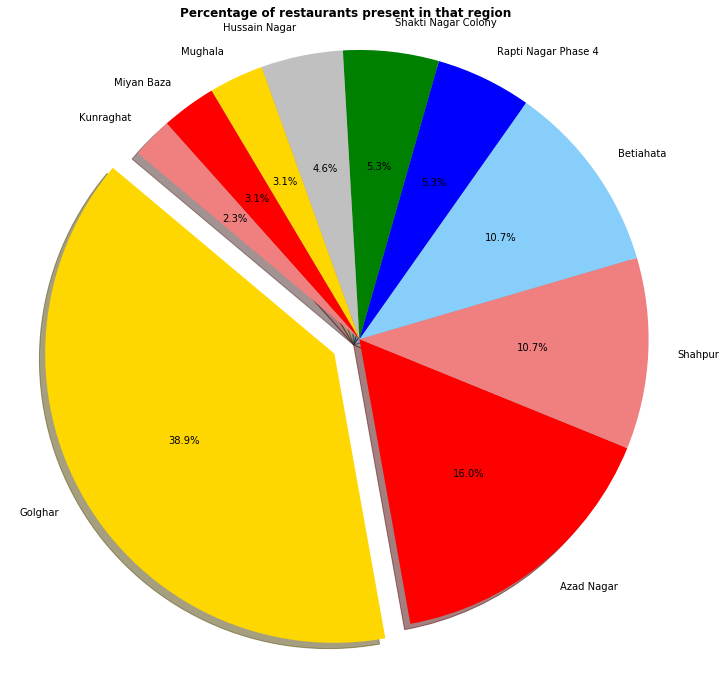

In [15]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [16]:
data['Rating_Types'].value_counts().head(10)

Average    132
Good        26
Name: Rating_Types, dtype: int64

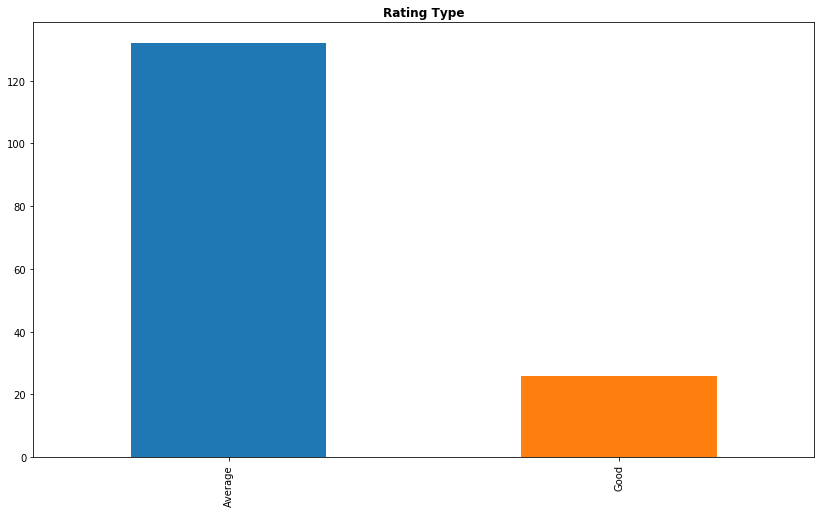

In [17]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [18]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       78
Casual Dining     31
Bakery            17
Sweet Shop         7
Café               6
Dessert Parlor     5
none               3
Fine Dining        2
Lounge             2
Dhaba              2
Name: Cuisine_Type, dtype: int64

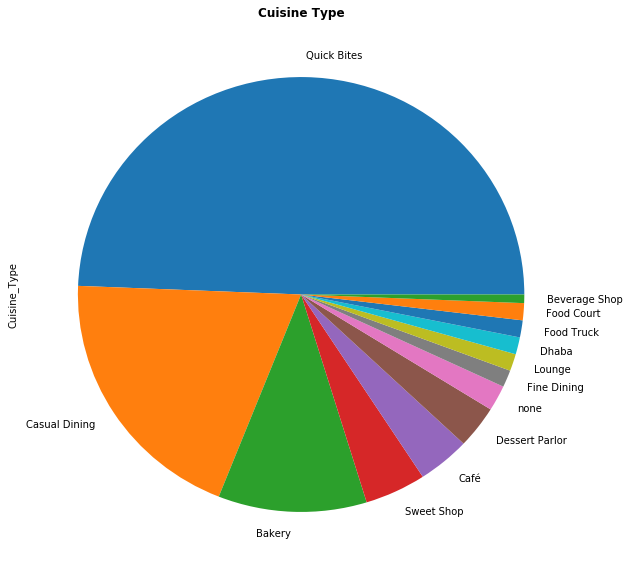

In [19]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [20]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [21]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [22]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.3278481012658205


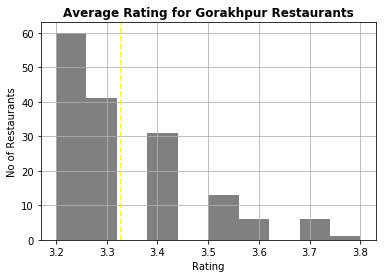

In [23]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Gorakhpur Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [24]:
#Average rating per restaurant in Dehradun is found to be around 3.3

# Top cuisines in Gorakhpur

In [25]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

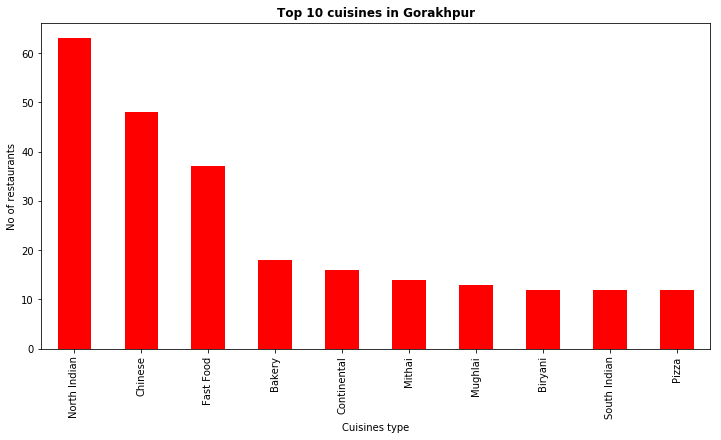

In [26]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Gorakhpur',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [27]:
data['Price'].value_counts()[:20]

100     28
300     28
200     25
150     14
500     13
1000    12
250     10
400      7
600      7
350      5
800      3
700      2
750      1
70       1
50       1
0        1
Name: Price, dtype: int64

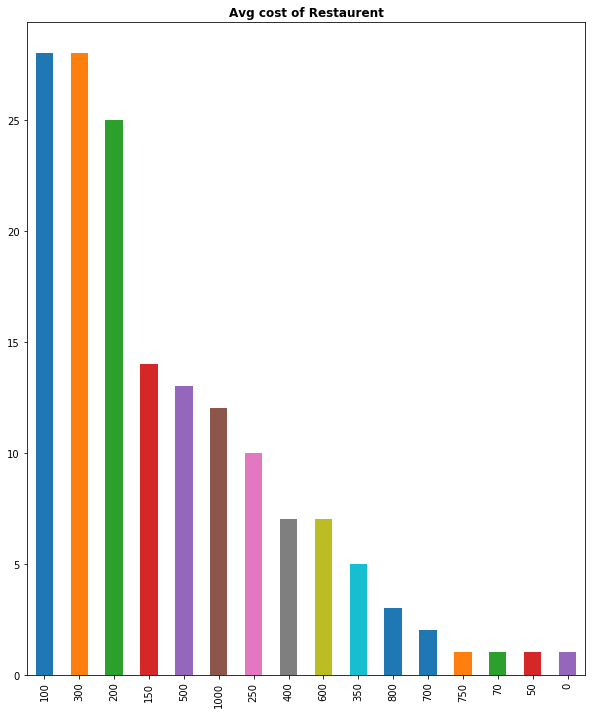

In [28]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [29]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

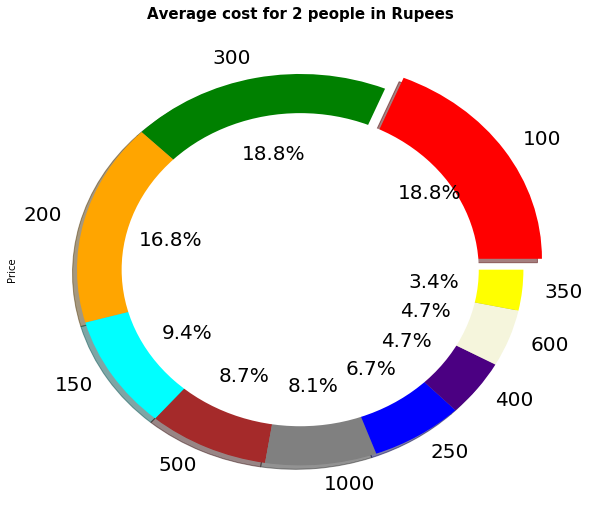

In [30]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 100